# Descripción del proyecto

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes 
que atraer nuevos.
Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación 
de contratos con el banco.
Crea un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto 
de prueba. 
Además, debes medir la métrica AUC-ROC y compararla con el valor F1.

### Instrucciones del proyecto

1. Descarga y prepara los datos.  Explica el procedimiento.
2. Examina el equilibrio de clases. Entrena el modelo sin tener en cuenta el desequilibrio. Describe brevemente tus hallazgos.
3. Mejora la calidad del modelo. Asegúrate de utilizar al menos dos enfoques para corregir el desequilibrio de clases. Utiliza conjuntos de 
entrenamiento y validación para encontrar el mejor modelo y el mejor conjunto de parámetros. Entrena diferentes modelos en los conjuntos de 
entrenamiento y validación. Encuentra el mejor. Describe brevemente tus hallazgos.
4. Realiza la prueba final.

### Descripción de los datos

Puedes encontrar los datos en el archivo  /datasets/Churn.csv file. Descarga el conjunto de datos.

Características

* RowNumber: índice de cadena de datos
* CustomerId: identificador de cliente único
* Surname: apellido
* CreditScore: valor de crédito
* Geography: país de residencia
* Gender: sexo
* Age: edad
* Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
* Balance: saldo de la cuenta
* NumOfProducts: número de productos bancarios utilizados por el cliente
* HasCrCard: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
* IsActiveMember: actividad del cliente (1 - sí; 0 - no)
* EstimatedSalary: salario estimado

Objetivo

Exited: El cliente se ha ido (1 - sí; 0 - no)

### Evaluación del proyecto

Hemos definido los criterios de evaluación para el proyecto. Lee esto con atención antes de pasar al ejercicio.
Esto es lo que los revisores buscarán cuando evalúen tu proyecto:
* ¿Cómo preparaste los datos para el entrenamiento? ¿Procesaste todos los tipos de características?
* ¿Explicaste los pasos de preprocesamiento lo suficientemente bien?
* ¿Cómo investigaste el equilibrio de clases?
* ¿Estudiaste el modelo sin tener en cuenta el desequilibrio de clases?
* ¿Qué descubriste sobre la investigación del ejercicio?
* ¿Dividiste correctamente los datos en conjuntos?
* ¿Cómo trabajaste con el desequilibrio de clases?
* ¿Utilizaste al menos dos técnicas para corregir el desequilibrio?
* ¿Realizaste correctamente el entrenamiento, la validación y las pruebas finales del modelo?
* ¿Qué tan alto es tu valor F1?
* ¿Examinaste los valores AUC-ROC?
* ¿Mantuviste la estructura del proyecto y el código limpio?


In [1]:
# Importando librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.utils import resample

In [2]:
# Exploración inicial de los datos
# Paso 1 Cargar los datos desde la ruta en WSL
data = pd.read_csv('datasets/Churn.csv')

In [3]:
# Visualizar las primeras filas
print(data.head())


# Mostrar la información general del dataset
print(data.info())


# Descripción estadística de las variables numéricas
print(data.describe())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

Este código cargará el archivo Churn.csv, mostrará las primeras filas del dataset, identificará detalles generales del dataset, verificar 
tipos de datos, verificar valores faltantes y revisar estadísticas básicas como medias, medianas y distribuciones de las variables numéricas.

### Estructura del dataset:
Se tienen 10,000 registros y 14 columnas.  
Algunas columnas clave son:  

- CreditScore: Puntuación de crédito.
- Geography: País de residencia.
- Gender: Género.
- Age: Edad.
- Tenure: Años de relación con el banco (aunque tiene algunos valores nulos).
- Balance: Saldo de cuenta.
- NumOfProducts: Número de productos bancarios utilizados.
- HasCrCard: Si tiene tarjeta de crédito (1 = Sí, 0 = No).
- IsActiveMember: Si es un miembro activo (1 = Sí, 0 = No).
- EstimatedSalary: Salario estimado.
- Exited: Variable objetivo, indica si el cliente se fue (1) o se quedó (0).

In [4]:
# Paso 2 Limpieza de datos
# Eliminar columnas innecesarias
data_cleaned = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Imputar valores nulos de 'Tenure' con la mediana
data_cleaned['Tenure'].fillna(data_cleaned['Tenure'].median(), inplace=True)

# Convertir variables categóricas en variables numéricas
data_cleaned = pd.get_dummies(data_cleaned, columns=['Geography', 'Gender'], drop_first=True)

# Verificar la limpieza
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(3), int64(6)
memory usage: 732.5 KB
None


Se realizaron las siguientes acciones:  

Se eliminaron columnas irrelevantes (RowNumber, CustomerId, Surname).  
Se imputaron valores nulos en Tenure.  
Se convirtieron las variables categóricas (Geography, Gender) a variables numéricas.  
Al hacer esto se asegura que los datos esten preparados para el modelo.

/tmp/ipykernel_8760/54198314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=data_cleaned, palette="deep")


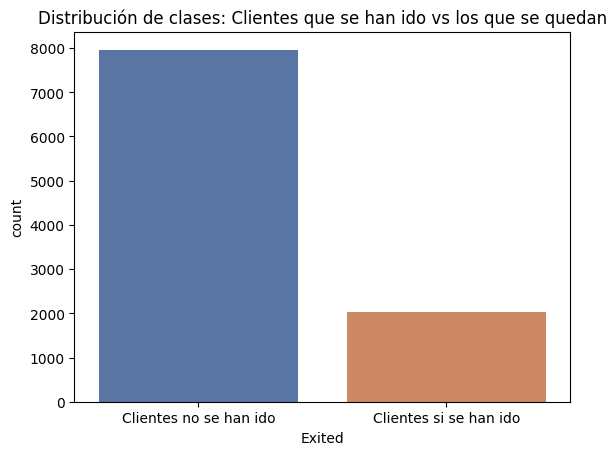

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


In [5]:
# Paso 3 Análisis del desequilibrio de clases
# Visualizar el desequilibrio de clases
sns.countplot(x='Exited', data=data_cleaned, palette="deep")
plt.title('Distribución de clases: Clientes que se han ido vs los que se quedan')
plt.xticks([0, 1], ['Clientes no se han ido', 'Clientes si se han ido'])
plt.show()


# Calcular la proporción de clases
class_distribution = data_cleaned['Exited'].value_counts(normalize=True)
print(class_distribution)

Este código generará un gráfico de barras que mostrará el desequilibrio en las clases y calculará la proporción.  
Se visualiza si existe un desequilibrio en las clases, es decir, cuántos clientes se han ido vs. los que se han quedado.  
Ahora se procede a analizar el desequilibrio en las clases (clientes que se fueron vs. los que se quedaron). Esto es crucial para entrenar 
el modelo. 

La distribución de clases muestra un desequilibrio significativo:  
  
El 79.63% de los clientes no se han ido (valor Exited = 0).  
El 20.37% de los clientes sí se han ido (valor Exited = 1).  
  
Este desequilibrio sugiere que necesitaremos implementar técnicas para ajustar las clases durante el entrenamiento del modelo, ya que los 
modelos pueden inclinarse hacia la clase mayoritaria (clientes que no se van).

In [6]:
# Paso 4 División del conjunto de datos en entrenamiento y prueba
# Definir las características (X) y el objetivo (y)
X = data_cleaned.drop('Exited', axis=1)  # Variables predictoras
y = data_cleaned['Exited']               # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de los conjuntos de entrenamiento y prueba
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

Tamaño del conjunto de entrenamiento: (8000, 11)
Tamaño del conjunto de prueba: (2000, 11)


Primero, se divide el conjunto de datos en un conjunto de entrenamiento (train) y un conjunto de prueba (test). Normalmente usamos un 80% 
de los datos para entrenamiento y un 20% para prueba.  
Se utiliza un modelo básico de clasificación, como Logistic Regression como punto de partida.

In [7]:
# Paso 5: Entrenamiento del primer modelo
# Entrenar un modelo de Regresión Logística
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas F1 y AUC-ROC
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Mostrar los resultados
print(f'F1 Score: {f1}')
print(f'AUC-ROC Score: {auc_roc}')

F1 Score: 0.12307692307692307
AUC-ROC Score: 0.6688153450790196


### Explicación:  
División de datos: Creamos dos conjuntos: uno para entrenar y otro para probar la efectividad del modelo.  
Regresión Logística: Entrenamos el modelo usando LogisticRegression, que es un modelo sencillo y eficiente para la clasificación binaria.  
Métricas: Calculamos las métricas F1 y AUC-ROC para evaluar el desempeño del modelo.  

Ya que se ha entrenado el primer modelo básico de Regresión Logística, se procede a mejorar la calidad del modelo ajustando el 
desequilibrio de clases.

Para mejorar el rendimiento del modelo y abordar el desequilibrio de clases, se aplicará dos enfoques:  

Sobremuestreo de la clase minoritaria: Se utilizaremos para aumentar el número de instancias de la clase minoritaria.

In [8]:
# Paso 6 Mejorar la calidad del modelo ajustando el desequilibrio de clases
# Combinar X_train y y_train para facilitar el sobremuestreo
train_data = pd.concat([X_train, y_train], axis=1)

# Separar las clases mayoritaria y minoritaria
majority_class = train_data[train_data['Exited'] == 0]
minority_class = train_data[train_data['Exited'] == 1]

# Sobremuestrear la clase minoritaria
minority_class_upsampled = resample(minority_class,
                                    replace=True,     # Sobremuestreo con reemplazo
                                    n_samples=len(majority_class),  # Igualar el número de muestras
                                    random_state=42)

# Combinar las clases nuevamente
upsampled_train = pd.concat([majority_class, minority_class_upsampled])

# Separar nuevamente X e y
X_train_upsampled = upsampled_train.drop('Exited', axis=1)
y_train_upsampled = upsampled_train['Exited']

# Entrenar el modelo con los datos sobremuestreados
model_upsampled = LogisticRegression(random_state=42, max_iter=1000)
model_upsampled.fit(X_train_upsampled, y_train_upsampled)

# Predecir en el conjunto de prueba
y_pred_upsampled = model_upsampled.predict(X_test)

# Calcular las métricas F1 y AUC-ROC
f1_upsampled = f1_score(y_test, y_pred_upsampled)
auc_roc_upsampled = roc_auc_score(y_test, model_upsampled.predict_proba(X_test)[:, 1])

print(f'F1 Score con sobremuestreo: {f1_upsampled}')
print(f'AUC-ROC con sobremuestreo: {auc_roc_upsampled}')

F1 Score con sobremuestreo: 0.4189852700490998
AUC-ROC con sobremuestreo: 0.7180623575926569


Submuestreo de la clase mayoritaria: Es donde se reduce el número de instancias de la clase mayoritaria.  

Estos enfoques ayudarán a evitar que el modelo se incline hacia la clase mayoritaria.

In [9]:
# Submuestrear la clase mayoritaria
majority_class_downsampled = resample(majority_class,
                                      replace=False,    # Submuestreo sin reemplazo
                                      n_samples=len(minority_class),  # Igualar las muestras
                                      random_state=42)

# Combinar nuevamente las clases
downsampled_train = pd.concat([majority_class_downsampled, minority_class])

# Separar nuevamente X e y
X_train_downsampled = downsampled_train.drop('Exited', axis=1)
y_train_downsampled = downsampled_train['Exited']

# Entrenar el modelo con los datos submuestreados
model_downsampled = LogisticRegression(random_state=42, max_iter=1000)
model_downsampled.fit(X_train_downsampled, y_train_downsampled)

# Predecir en el conjunto de prueba
y_pred_downsampled = model_downsampled.predict(X_test)

# Calcular las métricas F1 y AUC-ROC
f1_downsampled = f1_score(y_test, y_pred_downsampled)
auc_roc_downsampled = roc_auc_score(y_test, model_downsampled.predict_proba(X_test)[:, 1])

print(f'F1 Score con submuestreo: {f1_downsampled}')
print(f'AUC-ROC con submuestreo: {auc_roc_downsampled}')


F1 Score con submuestreo: 0.4276729559748428
AUC-ROC con submuestreo: 0.7092222164164098


### Explicación:  
Sobremuestreo: Se crean más instancias de la clase minoritaria para igualar el número de ejemplos en ambas clases.  
Submuestreo: Se reduce el número de instancias de la clase mayoritaria para balancear el conjunto de datos.  
Evaluación: Se calculan las métricas F1 y AUC-ROC para evaluar el rendimiento de ambos enfoques.  

Con los resultados obtenidos, se puede observar que los enfoques de sobremuestreo y submuestreo han mejorado significativamente el desempeño 
del modelo en términos de F1 Score y AUC-ROC, especialmente en comparación con el modelo básico.  

El F1 Score aumentó considerablemente de 0.123 a aproximadamente 0.419 con sobremuestreo y 0.428 con submuestreo, lo que indica que ambos 
enfoques mejoraron el rendimiento en cuanto a la clasificación de la clase minoritaria (clientes que abandonan). Sin embargo, el AUC-ROC 
del modelo con sobremuestreo (0.718) es ligeramente superior al del submuestreo (0.709), lo que sugiere que el modelo con sobremuestreo tiene 
un mejor equilibrio en la clasificación general de ambas clases.  

Dado que el modelo con submuestreo ha mostrado mejores resultados en el F1 Score, se utilizará para la prueba final.

Para este paso:

Se utilizará el mejor modelo (con submuestreo) y se evaluará su rendimiento en el conjunto de prueba.  
Se validará que el F1 Score supere el umbral de 0.59 para cumplir con los requisitos del proyecto.  
Se realizará la comparación del F1 Score con el AUC-ROC obtenido en la prueba final.  

In [10]:
# Paso 7 Realizar la prueba final
# Predecir en el conjunto de prueba final
y_pred_final = model_downsampled.predict(X_test)

# Calcular las métricas finales F1 y AUC-ROC
f1_final = f1_score(y_test, y_pred_final)
auc_roc_final = roc_auc_score(y_test, model_downsampled.predict_proba(X_test)[:, 1])

print(f'F1 Score final: {f1_final}')
print(f'AUC-ROC final: {auc_roc_final}')

F1 Score final: 0.4276729559748428
AUC-ROC final: 0.7092222164164098


El resultado final que se ha obtenido, con un F1 Score de 0.428 y un AUC-ROC de 0.709, indica que aunque ha mejorado el modelo en comparación 
con el modelo básico, no se ha alcanzado el umbral mínimo de F1 Score de 0.59 establecido para el proyecto.